In [53]:
from tweepy.streaming import StreamListener #class alows to listen based certain words
from tweepy import OAuthHandler #auth based on ID in other file
from tweepy import Stream #stream the tweets
from tweepy import API #Twitter API
from tweepy import Cursor 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import re
from textblob import TextBlob
from scipy.stats import gaussian_kde
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer as SIA

In [54]:
class AuthenticateTwitter():
    #API access
    def AuthenticTwitterApp(self):
        Authenticate = OAuthHandler("csAY7rBm36QJkVqDknC9elLRZ","acHPJUs1qrCuy9JUC6r3CmYV4LK3mUP9vJDEq52H0MznFbMt99")
        Authenticate.set_access_token("3438691899-RZPILsPZsrUQIbY1w6j0kTA1qrwWrXT9K8FWWgx","l1iJ7X0ZMlsEd7q4eSbJgsZpm1gB1Rb0V2QGcm0XQT6tG")
        
        return Authenticate

In [55]:
class ClientTwitter():
    #API Set up
    def __init__ (self, user_twitter=None):
        self.Authenticate = AuthenticateTwitter().AuthenticTwitterApp()
        self.twitter_client = API(self.Authenticate) 
        self.user_twitter = user_twitter
        
    def Twitter_API(self):
        
        return self.twitter_client

In [56]:
class AnalyseTweetTwitter():
        
    def D_F_Tweets(self, TTweets):
        #DATA CLEANSING
        #SHOWS TWEET
        dftweet = pd.DataFrame(data=[tweet.text for tweet in TTweets], columns=['TTweets']) 
        #SHOWS SENTIMENT OF TWEET        
        dftweet['TextBlob SA'] = np.array([SentimentTwitter().TextBlob_Tweet_Analyse_Sent(tweet) for tweet in dftweet['TTweets']])
        dftweet['Vader SA'] = np.array([SentimentTwitter().Vader_Tweet_Analyse_sent(tweet) for tweet in dftweet['TTweets']])
        #SHOWS HOW MANY LIKES
        dftweet['Likes']= np.array([tweet.favorite_count for tweet in TTweets])
        #WHEN CREATED
        dftweet['Created']= np.array([tweet.created_at for tweet in TTweets])
        #SHOWS SOURCE
        dftweet['Source of tweet']= np.array([tweet.source for tweet in TTweets])
        #SHOWS HOW MANY RETWEETS
        dftweet['Retweets']= np.array([tweet.retweet_count for tweet in TTweets])
        
        return dftweet 

In [57]:
class SentimentTwitter():
    
    #Cleansing of the tweet
    def Tweet_Cleansing(self, tweet):
        #takes out the characters that dont need to be there
        return ' '.join(re.sub("(\w+:\/\/\S+)|(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])", " ",tweet).split())
    
    def TextBlob_Tweet_Analyse_Sent(self, tweet):
        TextBlobAnalysedTweet = TextBlob(self.Tweet_Cleansing(tweet))#textblob gets the clean tweet and analyse's the tweet
        if TextBlobAnalysedTweet.sentiment.polarity >= 0.5:
            return 1
        elif TextBlobAnalysedTweet.sentiment.polarity > 0 and TextBlobAnalysedTweet.sentiment.polarity < 0.5:
            return 0.5
        elif TextBlobAnalysedTweet.sentiment.polarity == 0:
            return 0
        elif TextBlobAnalysedTweet.sentiment.polarity < 0 and TextBlobAnalysedTweet.sentiment.polarity > -.5:
            return -0.5
        else:
            return -1
    
    def Vader_Tweet_Analyse_sent(self, tweet):
        VaderAnalysedTweet = SIA()
        vs = VaderAnalysedTweet.polarity_scores(self.Tweet_Cleansing(tweet))
        if vs['compound'] >= 0.5:
            return 1
        elif vs['compound'] > 0 and vs['compound'] < 0.5:
            return 0.5
        elif vs['compound'] == 0:
            return 0
        elif vs['compound'] < 0 and vs['compound'] > -0.5:
            return -0.5
        else:
            return -1
    

In [77]:
if __name__ == "__main__":
    twitter_client = ClientTwitter()
    analyse_tweet = AnalyseTweetTwitter()
    api = twitter_client.Twitter_API()
    
    TTweets = api.user_timeline(screen_name = "atlanta_lawless", count = 50)
    Tweets = api.user_timeline(screen_name = "jeremycorbyn", count = 50)
    
    #TTweets = api.search(q = "cats", lang = "en", result_type = "recent", count = 20)
    
    
    dftweet = analyse_tweet.D_F_Tweets(TTweets) #gets what you want out of the tweet
    dftweet2 = analyse_tweet.D_F_Tweets(Tweets)
    print(dftweet)
    print(dftweet2)

                                              TTweets  TextBlob SA  Vader SA  \
0    RT @iamblackbear: ugh life but whatever its cool          0.5       0.5   
1                   sad maoam https://t.co/KS5SsAeqHH         -1.0      -0.5   
2   RT @hello_court: All in the news about those w...          0.0       0.0   
3                     WHY did feel good end like that          1.0       1.0   
4                 I love this https://t.co/2swJxe0o6g          1.0       1.0   
5   submitted my assignment 600 words under the wo...          0.0       0.5   
6   I think I have developed diabetes from the amo...         -0.5      -1.0   
7     https://t.co/Mv2aSvQuSB https://t.co/nVYHMgCmwS          0.0       0.0   
8   @LeJammyDodger @brennybanks Gonna have to agre...          0.0       0.5   
9   @brennybanks Peter Pan and the lost boys fuck ...         -0.5      -1.0   
10  Tinkerbell was a bit of a bitch in Peter Pan r...          0.5      -1.0   
11                          @JoeeBogann 

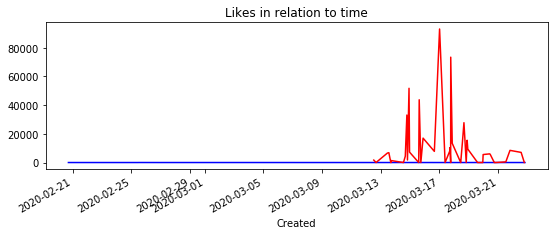

In [78]:
#Time Series
LikesToTime = pd.Series(data = dftweet['Likes'].values, index = dftweet['Created'])
LikesToTime.plot(figsize=(9,3), color='b')
LikesToTime = pd.Series(data = dftweet2['Likes'].values, index = dftweet2['Created'])
LikesToTime.plot(figsize=(9,3), color='r')
plt.title('Likes in relation to time')
plt.show()

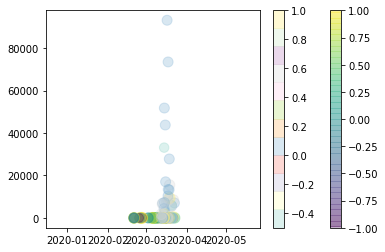

In [79]:
rng = dftweet['TextBlob SA']
x = dftweet['Created']
y = dftweet['Likes']
colors = rng 
sizes = 100 + (rng * 20)  

rng2 = dftweet2['TextBlob SA']
x2 = dftweet2['Created']
y2 = dftweet2['Likes']
colors2 = rng2
sizes2 = 100 + (rng2 * 20)


plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar();
plt.scatter(x2, y2, c=colors2, s=sizes2, alpha=0.3,
            cmap='Set3')
plt.colorbar();  # show color scale

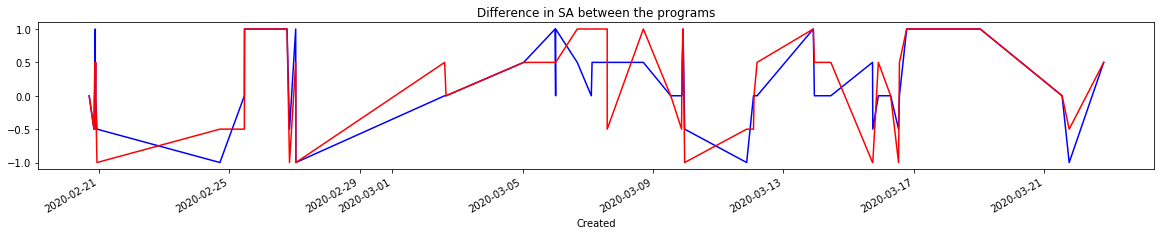

In [80]:
SAToTime = pd.Series(data = dftweet['TextBlob SA'].values, index = dftweet['Created'])
SAToTime.plot(figsize=(20,3), color='b')
SAToTime = pd.Series(data = dftweet['Vader SA'].values, index = dftweet['Created'])
SAToTime.plot(figsize=(20,3), color='r')
plt.title('Difference in SA between the programs')
plt.show()

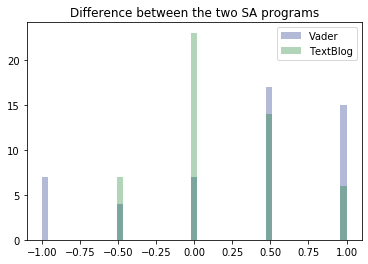

In [81]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-dark-palette')
data = dftweet2['Vader SA'].values
data2 = dftweet2['TextBlob SA'].values

bins = np.linspace(-1,1)

plt.hist(data,bins, alpha = 0.3, label=['Vader', 'y'])
plt.hist(data2,bins, alpha = 0.3, label=['TextBlog','y'])
plt.legend(loc='upper right')
plt.title('Difference between the two SA programs')
plt.show()

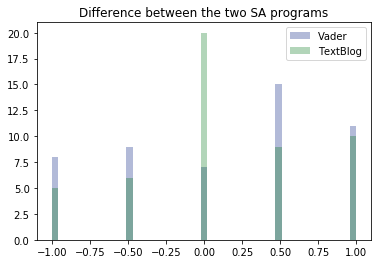

In [82]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-dark-palette')
data = dftweet['Vader SA'].values
data2 = dftweet['TextBlob SA'].values

bins = np.linspace(-1,1)

plt.hist(data,bins, alpha = 0.3, label=['Vader', 'y'])
plt.hist(data2,bins, alpha = 0.3, label=['TextBlog','y'])
plt.legend(loc='upper right')
plt.title('Difference between the two SA programs')
plt.show()

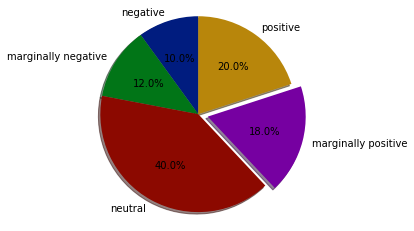

[ 5  6 20  9 10]


In [83]:
matplotlib.axes.Axes.pie
matplotlib.pyplot.pie
unique_elements, counts_elements = np.unique(dftweet['TextBlob SA'].values, return_counts= True)
labels =['negative', 'marginally negative','neutral','marginally positive','positive'];
explode = (0,0,0, 0.1, 0)  
plt.pie(counts_elements, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90 )
plt.axis('equal')
plt.show()
print(counts_elements)

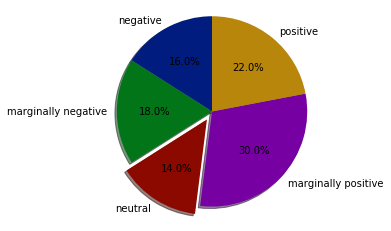

[ 8  9  7 15 11]


In [84]:
matplotlib.axes.Axes.pie
matplotlib.pyplot.pie
unique_elements, counts_elements = np.unique(dftweet['Vader SA'].values, return_counts= True)
labels =['negative', 'marginally negative','neutral','marginally positive','positive'];
explode = (0,0,0.1, 0, 0)  
plt.pie(counts_elements, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90 )
plt.axis('equal')
plt.show()
print(counts_elements)